# Extract Review Labels

Extract `(abstract, study-id)` tuples.

In [1]:
df = pd.read_csv('pico_cdsr.csv')
df = df[df.abstract.notnull() & df.population.notnull() & df.intervention.notnull() & df.outcome.notnull()].reset_index(drop=True)
df = df[['abstract', 'cdno']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46531 entries, 0 to 46530
Data columns (total 2 columns):
abstract    46531 non-null object
cdno        46531 non-null object
dtypes: object(2)
memory usage: 727.1+ KB


### Visualize `cdno` Distribution

In [2]:
cdnos = df.groupby('cdno')

len(cdnos)

4611

Most reviews have only a small number of studies...

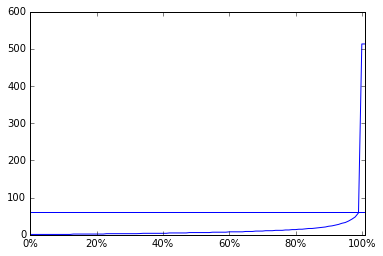

In [59]:
info = cdnos.size().describe(percentiles=np.linspace(start=0, stop=1, num=101))

axes = info['0%':].plot()
axes.axhline(y=60)

In [105]:
info

count    4611.000000
mean       10.091303
std        15.635355
min         1.000000
0%          1.000000
1%          1.000000
2%          1.000000
3%          1.000000
4%          1.000000
5%          1.000000
6%          1.000000
7.0%        1.000000
8%          1.000000
9%          1.000000
10%         1.000000
11%         1.000000
12%         1.000000
13%         2.000000
14.0%       2.000000
15%         2.000000
16%         2.000000
17%         2.000000
18%         2.000000
19%         2.000000
20%         2.000000
21%         2.000000
22%         2.000000
23%         3.000000
24%         3.000000
25%         3.000000
            ...     
72%        11.000000
73%        11.000000
74%        12.000000
75%        12.000000
76%        12.000000
77%        13.000000
78%        13.000000
79%        14.000000
80%        14.000000
81%        15.000000
82%        15.000000
83%        16.000000
84%        17.000000
85%        17.000000
86%        18.000000
87%        19.000000
88%        20

The number of studies greater than a certain number drops off exponentially...

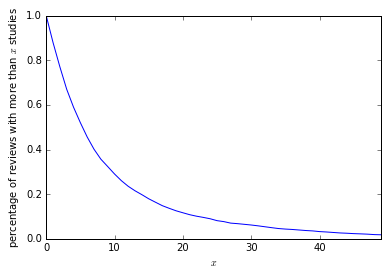

In [50]:
nb_review = len(cdnos)

s = pd.Series(len(cdnos.size()[cdnos.size() > i]) / float(len(cdnos)) for i in range(50))
s.name = 'foo'
s.index.name = '$x$'

axes = s.plot()
plt.ylabel('percentage of reviews with more than $x$ studies')

Here's a good view of how many reviews there are having a certain amount of studies. We can see that reviews having at least 25 studies are usually in the single digits.

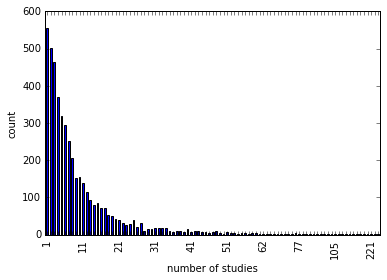

In [174]:
axes = cdnos.size().value_counts().sort_index().plot(kind='bar')

locs, labels = plt.xticks()

new_labels = ['']*len(labels)
for i in range(0, len(labels), 10):
    new_labels[i] = labels[i].get_text()
    
plt.xticks(locs, new_labels)
axes.set_xlabel('number of studies')
axes.set_ylabel('count')

Since there are over 100 reviews with 10 studies, let's collect all the reviews with exactly 10 studies. This will net us over 1000 studies, a sizeable amount for our test set.

In [184]:
cdno_set = set(cdnos.size()[cdnos.size() == 10].index)

In filtering down the studies, we want to keep the original indices of the studies so we can look them up in the full dataframe.

In [190]:
test_df = df[df.cdno.map(lambda cdno: cdno in cdno_set)]

test_df.to_csv('study_inclusion.csv')